<a href="https://colab.research.google.com/github/w4bo/AA2425-unibo-mldm/blob/master/slides/lab-01-dataunderstanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pandas

**Pandas** is the shorthand for 'Python and Data Analysis'

- It provides a rich set of features for exploring and manipulating data
- https://pandas.pydata.org/

pandas (Python) is a solution for the manipulation of relational data

- Two main data types: Series (e.g., temporal series) and DataFrame (e.g., table)
- Support to SQL-like operations (join/merge, aggregation, etc.)
- Data transformation: imputation of missing values, manipulation of data shape, ...
- By convention, the package pandas is imported as `pd`


In [ ]:
import pandas as pd
print(pd.__version__)

2.2.2


... plus we will use other libraries

In [ ]:
import numpy as np  # fast operations on arrays
import seaborn as sns  # plots
import matplotlib.pyplot as plt  # plots

## [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

- Two-dimensional, size-mutable, potentially heterogeneous tabular data.
- The primary pandas data structure.
- Data structure also contains labeled axes (rows and columns).
- Arithmetic operations align on both row and column labels.
- Can be thought of as a dict-like container for Series objects.

In [ ]:
# create a numeric dataframe/table
df = pd.DataFrame([[i + j for i in range(10)] for j in range(5)],
                  index=[i for i in range(5)],
                  columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
0,0,1,2,3,4,5,6,7,8,9
1,1,2,3,4,5,6,7,8,9,10
2,2,3,4,5,6,7,8,9,10,11
3,3,4,5,6,7,8,9,10,11,12
4,4,5,6,7,8,9,10,11,12,13


## Some operations

In [ ]:
# Get the headers (i.e., the column names)
df.columns
# Get just the first two rows
df.head(2)
# Get just the last two rows
df.tail(2)
# Sort the dataframe by columns
df.sort_values(by=['a', 'b'], ascending=[False, True])

,a,b,c,d,e,f,g,h,i,j
4,4,5,6,7,8,9,10,11,12,13
3,3,4,5,6,7,8,9,10,11,12
2,2,3,4,5,6,7,8,9,10,11
1,1,2,3,4,5,6,7,8,9,10
0,0,1,2,3,4,5,6,7,8,9


## [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

A sequence of values with the same type

- Each value is associate with a label
- Supported values and label types are the ones from NumPy (float64, int64, etc.)
- In other words, a series is a mono-dimensional vector of elements

The index of a series is the sequence of labels

- Label are usually numeric or string identifiers (e.g., the primary key of a database table)
- Labels need not be unique but must be a hashable type (both integer- and label-based indexing)

In [ ]:
pd.Series([1, 2, 3], index=["a", "b", "c"])

a    1
b    2
c    3
dtype: int64

In [ ]:
# Select a column (i.e., a series) as in a SQL projection
df['a']

0    0
1    1
2    2
3    3
4    4
Name: a, dtype: int64

## Doing some element-wise operations

Operations between Series (e.g., +, -, /) align values based on their associated index values

In [ ]:
# Add another column to the dataframe
df['k'] = df['a'] * df['b']
df

,a,b,c,d,e,f,g,h,i,j,k
0,0,1,2,3,4,5,6,7,8,9,0
1,1,2,3,4,5,6,7,8,9,10,2
2,2,3,4,5,6,7,8,9,10,11,6
3,3,4,5,6,7,8,9,10,11,12,12
4,4,5,6,7,8,9,10,11,12,13,20


In [ ]:
ser_a = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser_b = pd.Series([1, 2, 3], index=["b", "a", "c"])
ser_a + ser_b  # +, -, /, *

a    3
b    3
c    6
dtype: int64

## Doing some aggregation

In [ ]:
ser_c = df["a"]
ser_c.count()  # => 5
ser_c.sum()    # => 10
ser_c.mean()   # => 2.0
ser_c.max()    # => 4
ser_c.min()    # => 0
ser_c.idxmax() # => 4

np.int64(4)

In [ ]:
df.groupby(['a']).agg(['min', 'max'])

b       c       d       e       f       g       h       i       j       k  \
  min max min max min max min max min max min max min max min max min max min   
a                                                                               
0   1   1   2   2   3   3   4   4   5   5   6   6   7   7   8   8   9   9   0   
1   2   2   3   3   4   4   5   5   6   6   7   7   8   8   9   9  10  10   2   
2   3   3   4   4   5   5   6   6   7   7   8   8   9   9  10  10  11  11   6   
3   4   4   5   5   6   6   7   7   8   8   9   9  10  10  11  11  12  12  12   
4   5   5   6   6   7   7   8   8   9   9  10  10  11  11  12  12  13  13  20   

       
  max  
a      
0   0  
1   2  
2   6  
3  12  
4  20

# Business and Data Understanding

## Understanding data types

"It is imperative to know the attribute properties to carry out meaningful operations and research with them"

- Why is data type important?
- What are the implications of a data type?

![Y2K22 bug](https://user-images.githubusercontent.com/18005592/232748093-a25e8ba7-24d4-4e2b-9e58-1553786cac33.png)


## Encoding data with the wrong type

Encoding the date 2022-01-01T00:01 into a signed integer $2201010001$

A signed integer is a 32-bit datum that represents an integer in the range:

- Valid range: $[-2^{31}, 2^{31}-1] = [-2147483648, 2147483647]$
- However, $2201010001 > 2147483647$

See also the [year 2000 problem](https://en.wikipedia.org/wiki/Year_2000_problem)

![Y2K](https://upload.wikimedia.org/wikipedia/commons/f/fb/Bug_de_l%27an_2000.jpg)


## Type inference

Pandas automatically infers data types, or they can be specified during creation

- `np.floatN` represents floating numbers (e.g., -3.14)
- `np.intN`/`np.uintN` represent integers with/without sign (e.g., -42 and 42)
    - `N` is the number of needed bits: 8, 16, 32 o 64
- `bool`: Boolean values
- `datetime64`, timedelta64: timestamp and time intervals
- `object`: mainly used for strings

In [ ]:
df = pd.DataFrame([
    ['Cola',   'low',    '05/07/2021', 10, 2],
    ['Bread',  'medium', '05/07/2021', 25, 1],
    ['Beer',   'high',   '06/07/2021', 100, 3],
    ['Diaper', 'high',   '06/07/2021', np.nan, 4],
    ['Pizza',  'medium', '06/07/2021', 25, 5]], columns=['ID', 'PriceBin', 'Date', 'Quantity', 'Review'])
df.dtypes

ID           object
PriceBin     object
Date         object
Quantity    float64
Review        int64
dtype: object

## Attribute types

The attribute type determines which operator can be applied to the attribute

- Equality, sort, sum, ratio, etc.
- It makes sense to compute the average `Quantity` but not the average `ID`

Different attribute types

- (Categorical) **Nominal**: can distinguish the values (i.e., check equality)
- (Categorical) **Ordinal**: can distinguish and sort the values
- (Numeric) **Interval**: can distinguish and sort the values, and compute their difference
- (Numeric) **Ratio**: can distinguish and sort the values, and compute their difference and ratio

## The Likert scale

- `[*, **, ***, ****, *****]`
- `[1, 2, 3, 4, 5]`

What about averaging?

## The Likert scale

    Converting responses to a Likert-type question into an average seems an obvious and intuitive step, but it doesn't necessarily constitute good methodology. One important point is that respondents are often reluctant to express a strong opinion and may distort the results by gravitating to the neutral midpoint response. It also assumes that the emotional distance between mild agreement or disagreement and strong agreement or disagreement is the same, which isn't necessarily the case. At its most fundamental level, the problem is that the numbers in a Likert scale are not numbers as such, but a means of ranking responses.
    
The Likert scale is widely used in social work research, and is commonly constructed with four to seven points. It is usually treated as an interval scale, but strictly speaking it is an ordinal scale, where arithmetic operations cannot be conducted [1]

[1] Wu, Huiping, and Shing-On Leung. "Can Likert scales be treated as interval scales?—A simulation study." Journal of social service research 43.4 (2017): 527-532.

## Data profiling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        5 non-null      object 
 1   PriceBin  5 non-null      object 
 2   Date      5 non-null      object 
 3   Quantity  4 non-null      float64
 4   Review    5 non-null      int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 332.0+ bytes


## Data profiling

In [ ]:
# To get some statistics (e.g., count, mean, std, min, etc.)
df.describe(include='all')

,ID,PriceBin,Date,Quantity,Review
count,5,5,5,4.000000,5.000000
unique,5,3,2,NaN,NaN
top,Cola,medium,06/07/2021,NaN,NaN
freq,1,2,3,NaN,NaN
mean,NaN,NaN,NaN,40.000000,3.000000
std,NaN,NaN,NaN,40.620192,1.581139
min,NaN,NaN,NaN,10.000000,1.000000
25%,NaN,NaN,NaN,21.250000,2.000000
50%,NaN,NaN,NaN,25.000000,3.000000
75%,NaN,NaN,NaN,43.750000,4.000000


# The [`California Housing`](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) case study

Our task is to use California census data to forecast housing prices given the population, median income, and median housing price for each block group in California.
Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).
We will just call them "districts" for short.

In [ ]:
# df = pd.read_csv("/content/sample_data/california_housing_train.csv", delimiter=",")
df = pd.read_csv("https://raw.githubusercontent.com/w4bo/handsOnDataPipelines/main/materials/datasets/housing.csv", delimiter=",")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


##  ... and now?

#
Answer some questions:

- Which attributes (i.e., columns) are contained in the dataset?
- Which is their semantics?

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Dataset description

1. `longitude`: A measure of how far west a house is; a higher value is farther west
2. `latitude`: A measure of how far north a house is; a higher value is farther north
3. `housingMedianAge`: Median age of a house within a block; a lower number is a newer building
4. `totalRooms`: Total number of rooms within a block
5. `totalBedrooms`: Total number of bedrooms within a block
6. `population`: Total number of people residing within a block
7. `households`: Total number of households, a group of people residing within a home unit, for a block
8. `medianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. `medianHouseValue`: Median house value for households within a block (measured in US Dollars)
10. `oceanProximity`: Location of the house w.r.t ocean/sea

## Data profiling

In [ ]:
# show some statistics on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


## ... are you satisfied with the understanding?

## ... what about data visualization?

Can we exploit the nature of the data?

##

<Axes: xlabel='longitude', ylabel='latitude'>

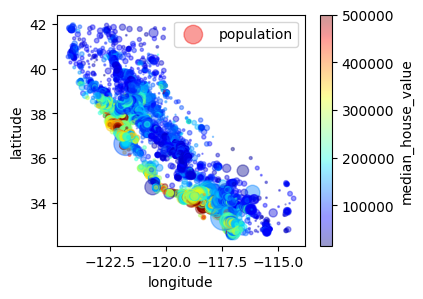

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df["population"]/100, label="population", figsize=(4,3), c="median_house_value", cmap="jet", colorbar=True)

## What if we integrate open data?

## Can we exploit the nature of the data... again?

![California, USA](https://github.com/w4bo/2024-bbs-dm/assets/18005592/06d9fd78-5856-4119-accb-62de0f54b680)


## Merging the data sources

![](https://user-images.githubusercontent.com/18005592/232756567-b706619a-2cc9-4b45-b78f-5172103e0c3b.png)

## Memory usage

What if I change float64 to float32?

In [ ]:
dff = df.copy(deep=True)  # copy the dataframe
for x in df.columns:  # iterate over the columns
    if dff[x].dtype == 'float64':  # if the column has type `float64`
        dff[x] = dff[x].astype('float32')  # ... change it to `float32`
dff.info()  # show some statistics on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float32
 1   latitude            20640 non-null  float32
 2   housing_median_age  20640 non-null  float32
 3   total_rooms         20640 non-null  float32
 4   total_bedrooms      20433 non-null  float32
 5   population          20640 non-null  float32
 6   households          20640 non-null  float32
 7   median_income       20640 non-null  float32
 8   median_house_value  20640 non-null  float32
 9   ocean_proximity     20640 non-null  object 
dtypes: float32(9), object(1)
memory usage: 887.0+ KB


## Missing values
There are some missing values for `total_bedrooms`. What should we do?

Most Machine Learning algorithms cannot work with missing features. We have three main options:

- Get rid of the corresponding districts (i.e., drop the rows)
    - `df.dropna(subset=["total_bedrooms"])`
- Get rid of the whole attribute (i.e., drop the columns)
    - `df.drop("total_bedrooms", axis=1)`
- Set the values to some value (zero, the mean, the median, etc.)
    - `df["total_bedrooms"].fillna(df["total_bedrooms"].median())`

## Non-numeric attributes

`ocean_proximity` is a text attribute, but not all machine libraries can manipulated textual data types.

In [ ]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: >

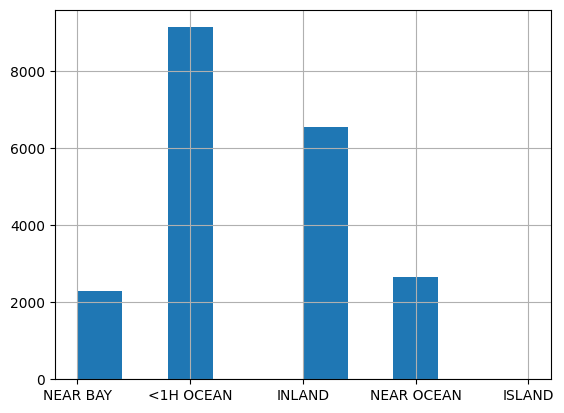

In [ ]:
df["ocean_proximity"].hist()

## Visualization

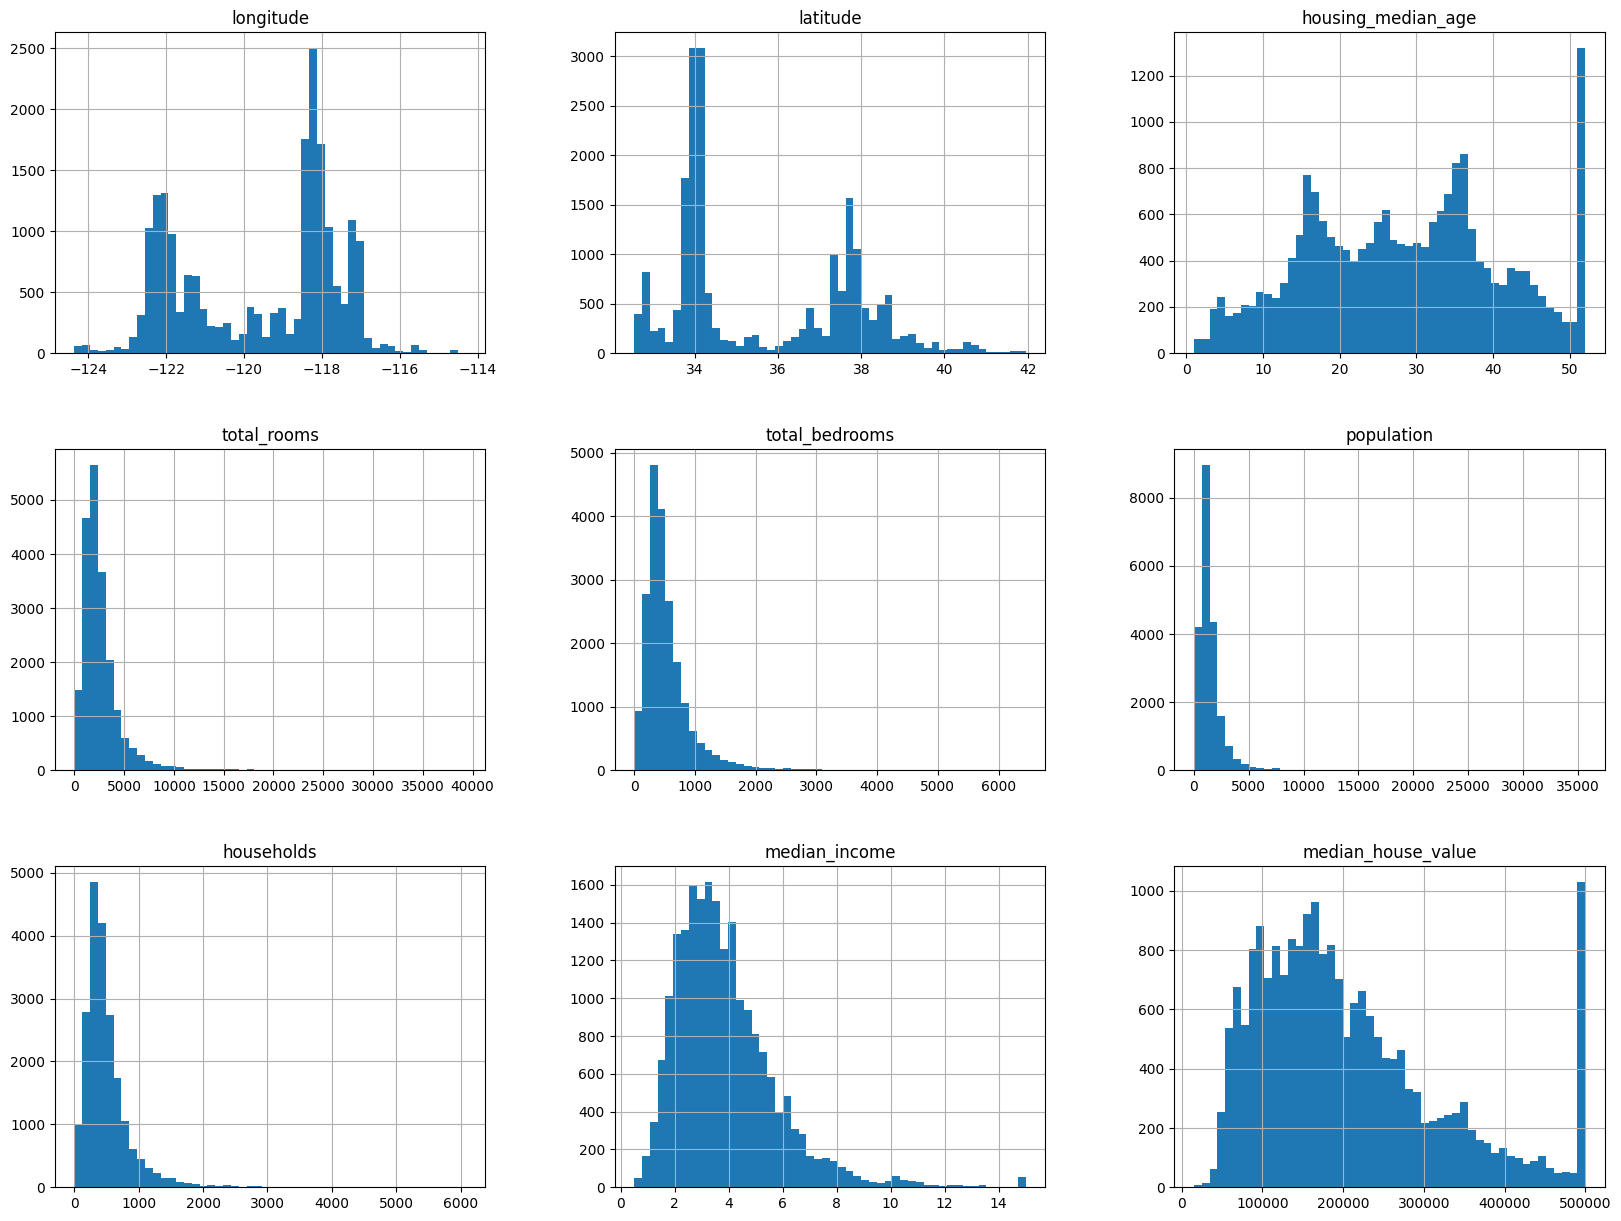

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=50, figsize=(20, 15))
plt.show()

## Open questions

- `median_income` should be in dollars. However, it has a strange range. Why? "you are told that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars. The numbers represent roughly tens of thousands of dollars"
- `housing_median_age` and `median_house_value` are capped. As to `median_house_value`, this is a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond 500,000USD, then you have mainly two options: (a) collect proper labels for the districts whose labels were capped, (b) remove those districts from the training set."
- These attributes have very different scales. Should we scale them?
- Many histograms are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns

## Relationships between variables

- A grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column
- The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.


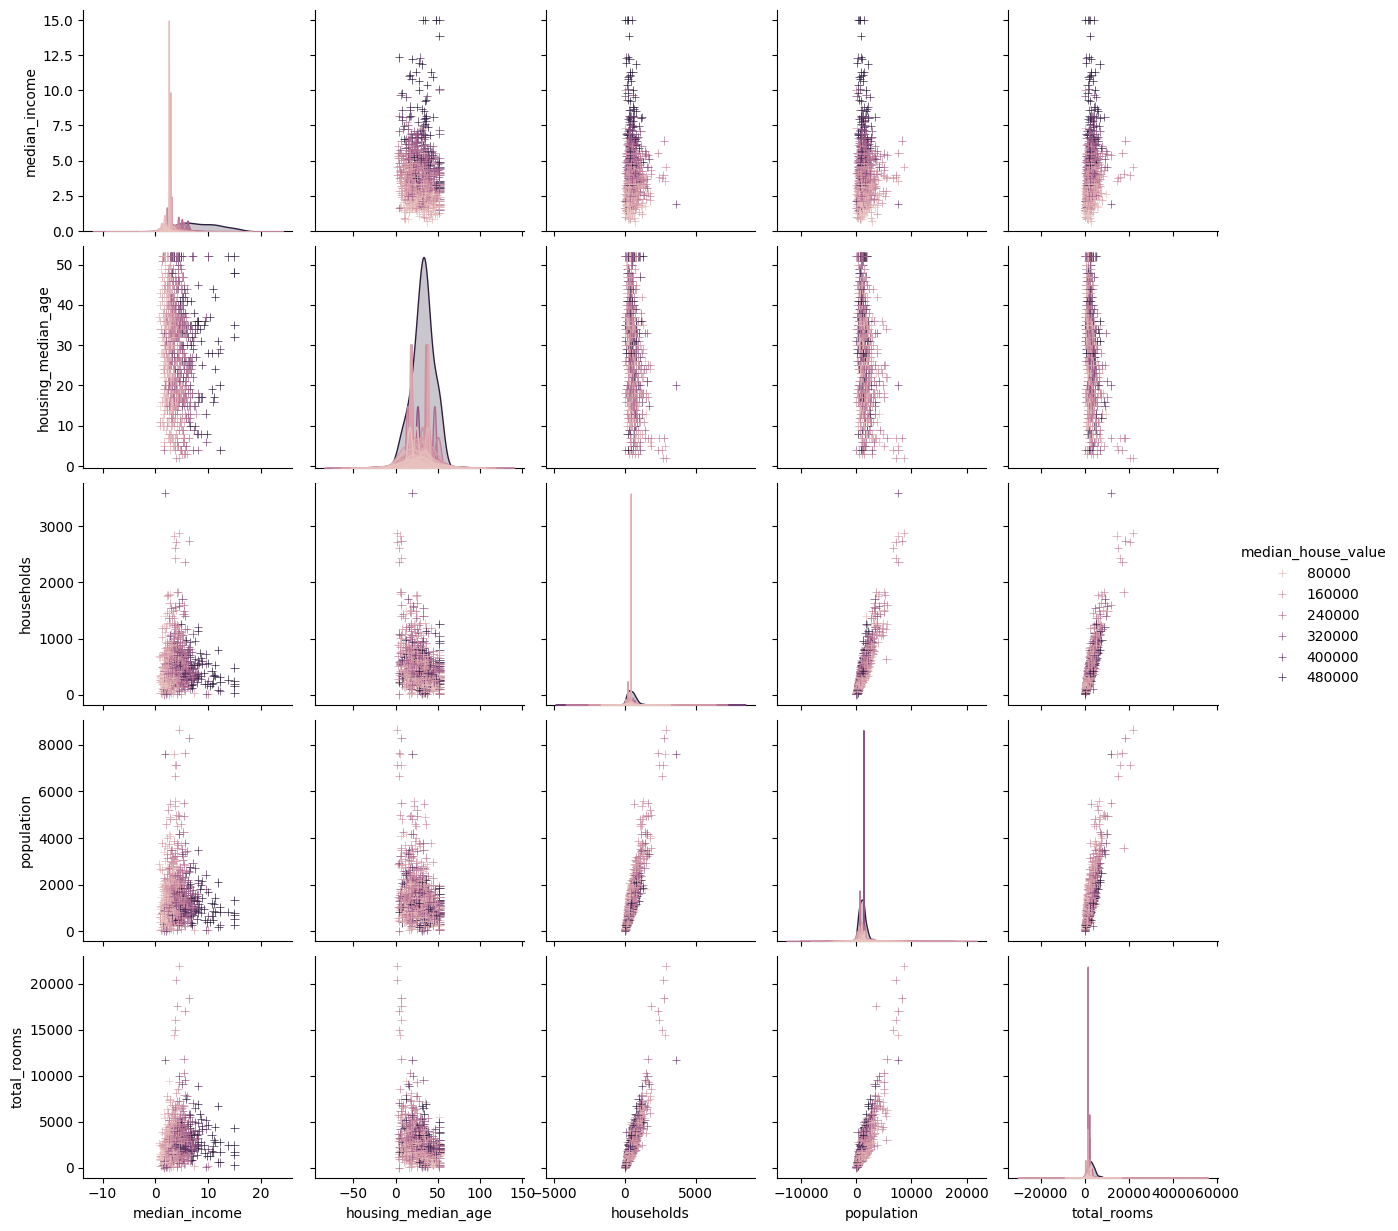

In [ ]:
tmp = df[["median_income", "housing_median_age", "median_house_value", "households", "population", "total_rooms"]]
sns.pairplot(tmp.sample(n=1000, random_state=42), hue='median_house_value', markers='+')
plt.show()

## Exercise 1

1. For each `ocean_proximity`, return the number of blocks
2. Return the `ocean_proximity` with the highest number of blocks
3. Print the mean value per `ocean_proximity` for every column
4. Print the mean, min and max values value per `ocean_proximity` for every column

In [ ]:
# Write your code here

## Exercise 2

1. Add a new column: `population_per_household = population / households`
1. Add a new column: `rooms_per_household = total_rooms / households`
1. Add a new column: `bedrooms_per_room = total_bedrooms / total_rooms`

In [ ]:
# Write your code here

""
